<a href="https://colab.research.google.com/github/Bhashithajkak/Image-Processing/blob/main/ImageProcessingTakeHome1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install dependencies & import libraries

In [24]:
!pip install opencv-python-headless matplotlib

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image


Helper function: Show images

In [25]:
def show_image(img, title='Image', cmap='gray'):
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()


Upload and load the image

Saving 19924112054_84383a8385_k.jpg to 19924112054_84383a8385_k (2).jpg


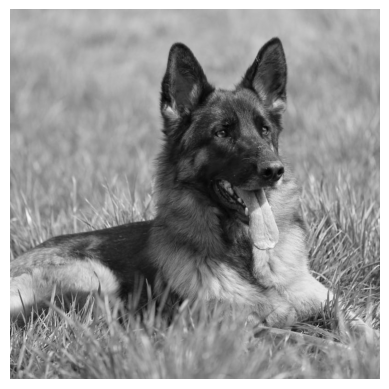

In [41]:
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
original_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
show_image(original_img, '')


# Task 1: Reduce number of intensity levels

Enter desired number of intensity levels (must be a power of 2, e.g., 2, 4, 8, ...): 2


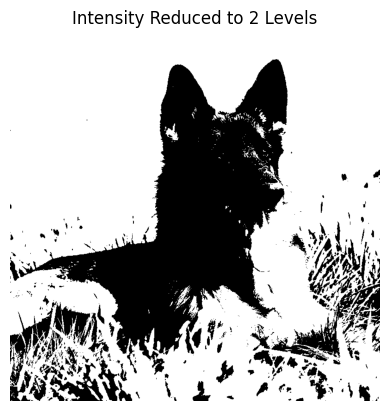

In [38]:
def reduce_intensity_levels(img, levels):
    factor = 256 // levels
    reduced_img = (img // factor) * factor
    return reduced_img

levels = int(input("Enter desired number of intensity levels (must be a power of 2, e.g., 2, 4, 8, ...): "))
if levels & (levels - 1) != 0 or levels > 256 or levels < 2:
    raise ValueError("The number must be a power of 2 between 2 and 256.")
reduced_img = reduce_intensity_levels(original_img, levels)
show_image(reduced_img, f'Intensity Reduced to {levels} Levels')


# Task 2: Spatial averaging filter (blurring)

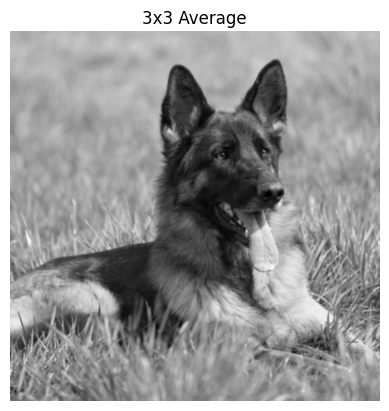

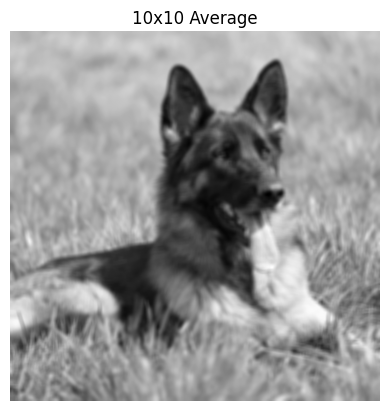

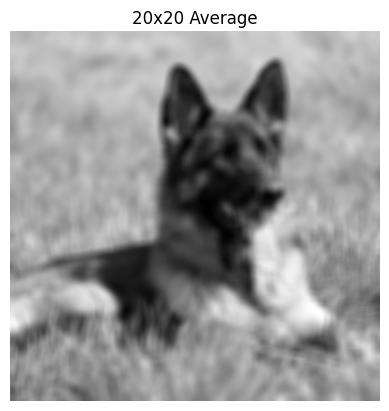

In [39]:
def spatial_average(img, kernel_size):
    return cv2.blur(img, (kernel_size, kernel_size))

# 3x3
blur3 = spatial_average(original_img, 3)
show_image(blur3, '3x3 Average')

# 10x10
blur10 = spatial_average(original_img, 10)
show_image(blur10, '10x10 Average')

# 20x20
blur20 = spatial_average(original_img, 20)
show_image(blur20, '20x20 Average')


# Task 3: Rotate image by 45 and 90 degrees

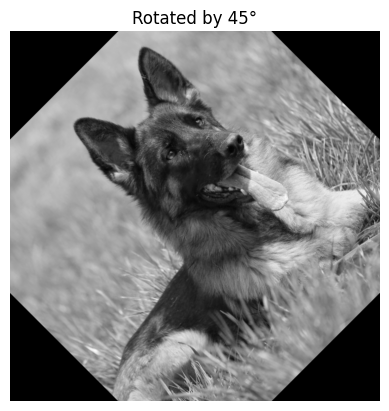

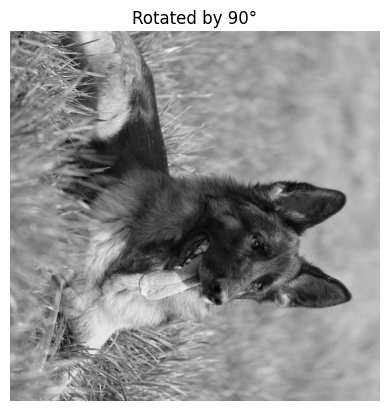

In [29]:
def rotate_image(img, angle):
    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(img, M, (w, h))
    return rotated

# Rotate by 45 degrees
rot45 = rotate_image(original_img, 45)
show_image(rot45, 'Rotated by 45°')

# Rotate by 90 degrees
rot90 = cv2.rotate(original_img, cv2.ROTATE_90_CLOCKWISE)
show_image(rot90, 'Rotated by 90°')


# Task 4: Block-wise averaging (non-overlapping)

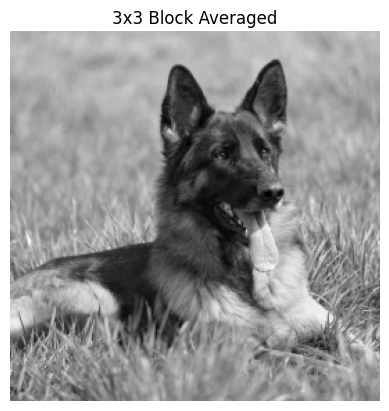

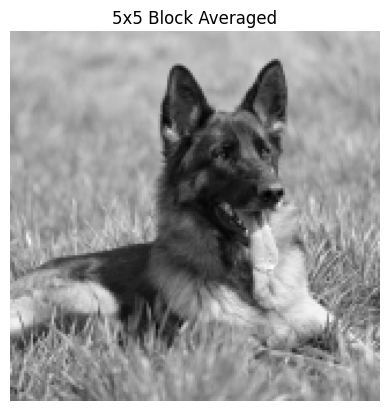

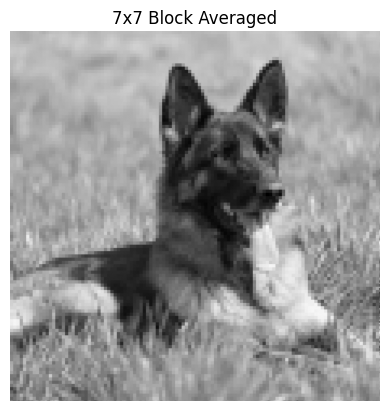

In [30]:
def block_average(img, block_size):
    h, w = img.shape
    output = img.copy()
    for y in range(0, h - block_size + 1, block_size):
        for x in range(0, w - block_size + 1, block_size):
            block = img[y:y+block_size, x:x+block_size]
            avg = int(np.mean(block))
            output[y:y+block_size, x:x+block_size] = avg
    return output

# 3x3 blocks
block3 = block_average(original_img, 3)
show_image(block3, '3x3 Block Averaged')

# 5x5 blocks
block5 = block_average(original_img, 5)
show_image(block5, '5x5 Block Averaged')

# 7x7 blocks
block7 = block_average(original_img, 7)
show_image(block7, '7x7 Block Averaged')
